Musicians: Mean = 5.02, Std Dev = 3.18
Non-Musicians: Mean = 3.51, Std Dev = 2.20
I have: 58 musicians
I have: 67 non musicians
Average of both musicians and non musicans: 4.21
practical T test: 3.7108472519688007
practical P test: 0.0002065667248676295
from library t-statistic: 3.09532470
from library p-value: 0.00243474



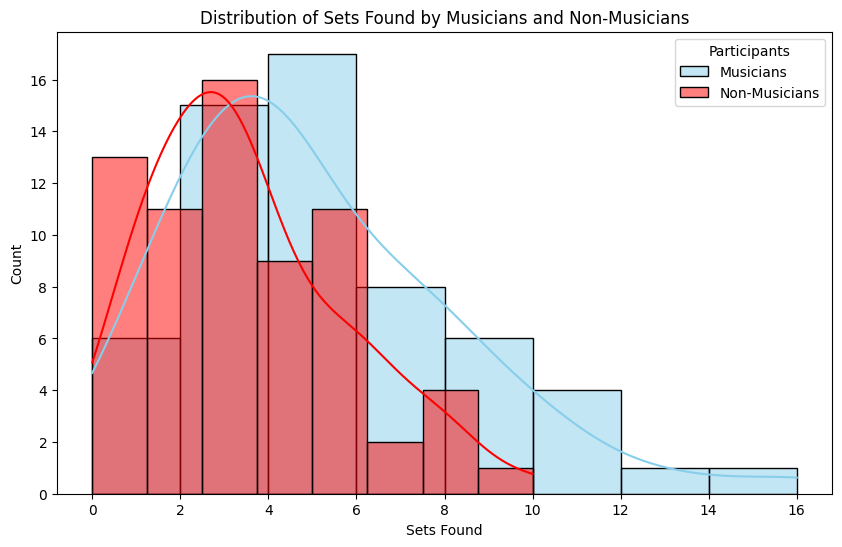

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
from scipy import stats

csvFile = 'https://raw.githubusercontent.com/ryanfernald/SET-game/main/SETProject%20Responces%20-%20Form%20Responses%201.csv'
df = pd.read_csv(csvFile)
df = df.drop([0, 1, 2])
df = df.drop(df.columns[1], axis=1)
df.columns = ["timestamp","musician", "frequency", "sets", "age", "major", "gpa", "inst_count", "last_played","stem"]
df = df.reset_index(drop=True)

musicians = df[df["musician"] == "Yes"]["sets"]
non_musicians = df[df["musician"] == "No"]["sets"]

# Calculate mean and standard deviation for musicians
mean_musicians = np.mean(musicians)
std_musicians = np.std(musicians)
mean_non_musicians = np.mean(non_musicians)
std_non_musicians = np.std(non_musicians)
mean_sets = np.mean(df.sets)

print(f"Musicians: Mean = {mean_musicians:.2f}, Std Dev = {std_musicians:.2f}")
print(f"Non-Musicians: Mean = {mean_non_musicians:.2f}, Std Dev = {std_non_musicians:.2f}")
print("I have:" ,musicians.count(), "musicians")
print("I have:" ,non_musicians.count(), "non musicians")
print(f"Average of both musicians and non musicans: {mean_sets:.2f}")

# t-test
t_stat, p_val = stats.ttest_ind(musicians, non_musicians)

practical_t_test = (mean_musicians - std_musicians) / np.sqrt((std_musicians ** 2 / musicians.count()) + (std_non_musicians ** 2 / non_musicians.count()))
print(f"practical T test: {practical_t_test}")
practical_p_value = (1 - scp.special.ndtr(practical_t_test)) * 2
print(f"practical P test: {practical_p_value}")

print(f"from library t-statistic: {t_stat:.8f}")
print(f"from library p-value: {p_val:.8f}")
print()

# histogram
plt.figure(figsize=(10,6))
sns.histplot(musicians, color="skyblue", label="Musicians", kde=True)
sns.histplot(non_musicians, color="red", label="Non-Musicians", kde=True)

plt.legend(title="Participants")
plt.xlabel("Sets Found")
plt.ylabel("Count")
plt.title("Distribution of Sets Found by Musicians and Non-Musicians")
plt.show()


<Axes: xlabel='sets', ylabel='Count'>

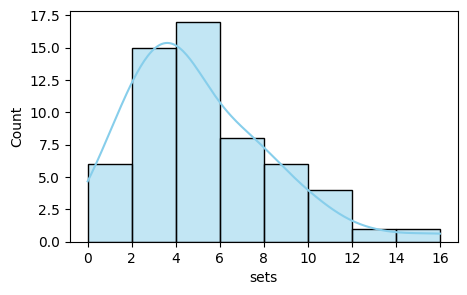

In [2]:
# Create histogram
plt.figure(figsize=(5,3))
sns.histplot(musicians, color="skyblue", label="musicians", kde=True)

<Axes: xlabel='sets', ylabel='Count'>

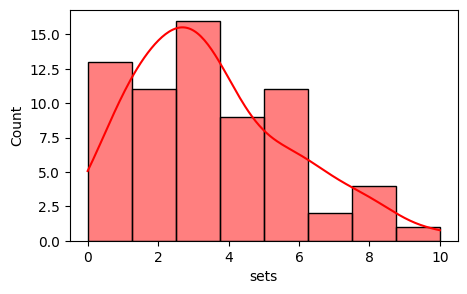

In [3]:
# Create histogram
plt.figure(figsize=(5,3))
sns.histplot(non_musicians, color="red", label="Non-Musicians", kde=True)

STEM students: Mean = 4.38, Std Dev = 2.86
Non STEM students: Mean = 3.17, Std Dev = 2.14
I have: 107 STEM students
I have: 18 Non STEM Students
practical T test: 2.1142142338819103
practical P test: 0.034496973696386934
from library t-statistic: 1.71122301
from library p-value: 0.08956060



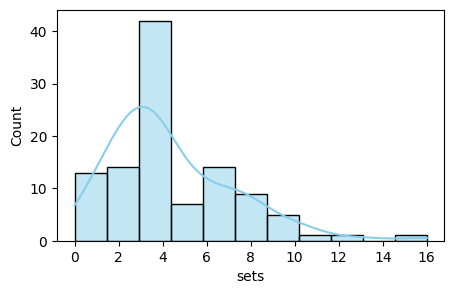

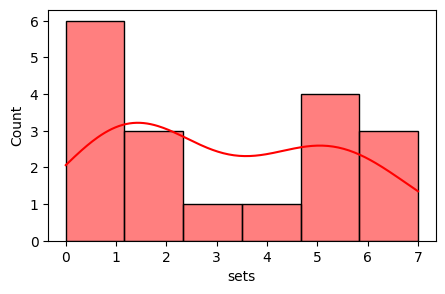

In [31]:
stem = df[df["stem"] == "yes"]["sets"]
non_stem = df[df["stem"] == "no"]["sets"]

# Calculate mean and standard deviation for stem students vs non stem students
mean_stem = np.mean(stem)
std_stem = np.std(stem)
mean_non_stem = np.mean(non_stem)
std_non_stem = np.std(non_stem)
total_mean = np.mean(df.sets)

print(f"STEM students: Mean = {mean_stem:.2f}, Std Dev = {std_stem:.2f}")
print(f"Non STEM students: Mean = {mean_non_stem:.2f}, Std Dev = {std_non_stem:.2f}")
print("I have:" ,stem.count(), "STEM students")
print("I have:" ,non_stem.count(), "Non STEM Students")

# t-test
t_stem_stat, p_stem_val = stats.ttest_ind(stem, non_stem)


practical_t_test_stem = (mean_stem - mean_non_stem) / np.sqrt((std_stem ** 2 / stem.count()) + (std_non_stem ** 2 / non_stem.count()))
print(f"practical T test: {practical_t_test_stem}")
practical_p_value_stem = (1 - scp.special.ndtr(practical_t_test_stem)) * 2
print(f"practical P test: {practical_p_value_stem}")

print(f"from library t-statistic: {t_stem_stat:.8f}")
print(f"from library p-value: {p_stem_val:.8f}")
print()

# histogram
plt.figure(figsize=(5,3))
sns.histplot(stem, color="skyblue", label="STEM", kde=True)
plt.show()
plt.figure(figsize=(5,3))
sns.histplot(non_stem, color="red", label="Non-STEM", kde=True)
plt.show()

Oldest:  41.0
Youngest:  18.0
Average age: = 21.70


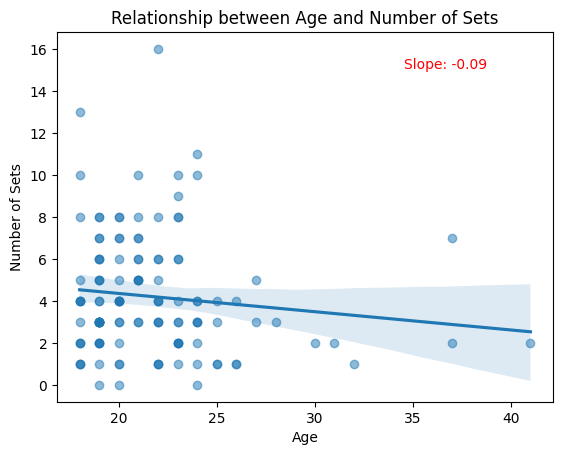

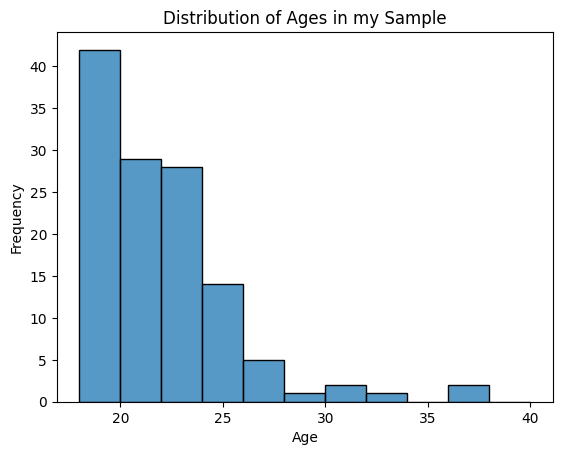

In [5]:
# age and sets found regplot
max_age = df.age.max()
min_age = df.age.min()
avg_age = df.age.mean()
print("Oldest: ", max_age)
print("Youngest: ", min_age)
print(f"Average age: = {avg_age:.2f}")


sns.regplot(x='age', y='sets', data=df, scatter_kws={'alpha': 0.5})
slope, intercept = np.polyfit(df['age'], df['sets'], 1)
plt.xlabel('Age')
plt.ylabel('Number of Sets')
plt.title('Relationship between Age and Number of Sets')
plt.annotate(f'Slope: {slope:.2f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10, color='red')

plt.show()

age_bins = range(18, 42, 2)
df['age_group'] = pd.cut(df['age'], bins=age_bins, right=False)
sns.histplot(data=df, x='age', bins=age_bins, kde=False, edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages in my Sample')
plt.show()


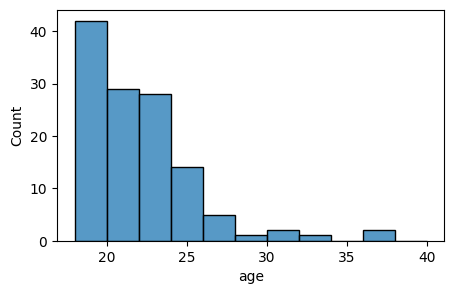

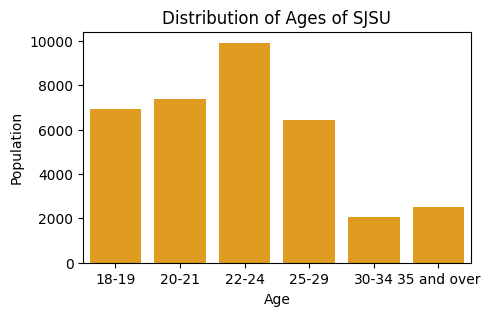

In [6]:
# Data for the school population from https://www.collegefactual.com/colleges/san-jose-state-university/student-life/diversity/#age_diversity
age_population_data = {
    'age_range': ['18-19', '20-21', '22-24', '25-29', '30-34', '35 and over'],
    'population': [6918, 7371, 9921, 6445, 2084, 2522]
}
school_population_df = pd.DataFrame(age_population_data)

plt.figure(figsize=(5,3))
sns.histplot(data=df, x='age', bins=age_bins, kde=False, edgecolor='black', label='Students in SET Project')
plt.show()
plt.figure(figsize=(5,3))
sns.barplot(data=school_population_df, x='age_range', y='population', color='orange', label='School Population')

plt.xlabel('Age')
plt.ylabel('Population')
plt.title('Distribution of Ages of SJSU')
plt.show()

Highest GPA:  4.0
Lowest GPA:  2.0
Average GPA: = 3.47


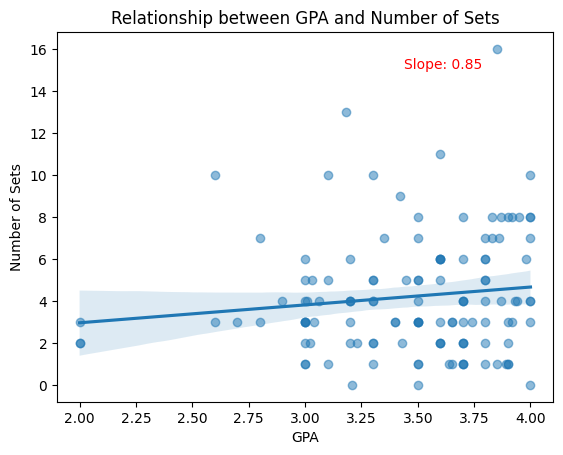

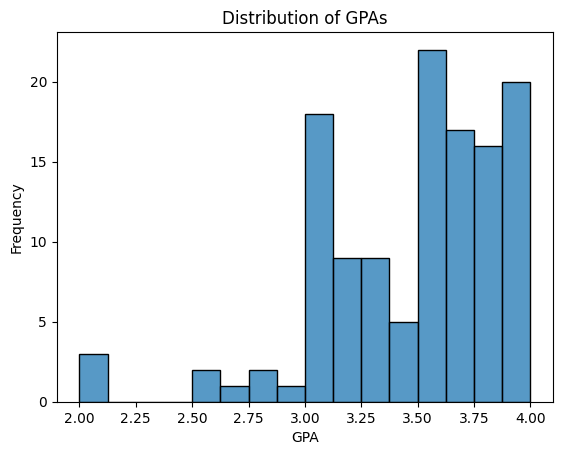

In [7]:
# GPA and sets analysis
max_gpa = df.gpa.max()
min_gpa = df.gpa.min()
avg_gpa = df.gpa.mean()
print("Highest GPA: ", max_gpa)
print("Lowest GPA: ", min_gpa)
print(f"Average GPA: = {avg_gpa:.2f}")

# Scatter plot with regression line for GPA and sets
sns.regplot(x='gpa', y='sets', data=df, scatter_kws={'alpha': 0.5})
slope, intercept = np.polyfit(df['gpa'], df['sets'], 1)
plt.xlabel('GPA')
plt.ylabel('Number of Sets')
plt.title('Relationship between GPA and Number of Sets')
plt.annotate(f'Slope: {slope:.2f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10, color='red')
plt.show()

# Histogram for GPA
gpa_bins = np.arange(df.gpa.min(), df.gpa.max() + 0.125, 0.125)
df['gpa_group'] = pd.cut(df['gpa'], bins=gpa_bins, right=False)
sns.histplot(data=df, x='gpa', bins=gpa_bins, kde=False, edgecolor='black')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title('Distribution of GPAs')
plt.show()

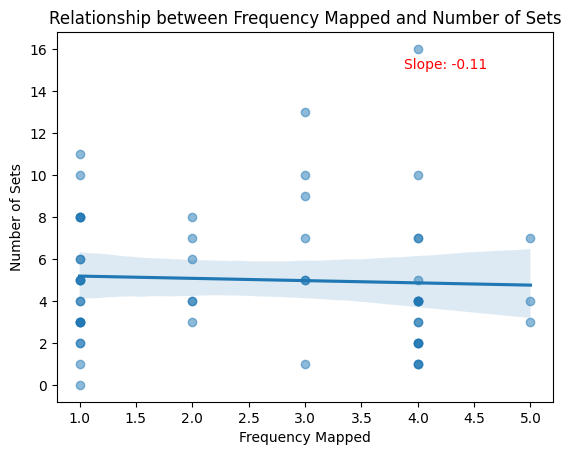

In [8]:
# new df for musicians
musicians_df = df[df['musician'] == 'Yes'].copy()
# cleaning a single broken data point I forgot to fix earlier
musicians_df.at[59, 'frequency'] = 'Daily'

frequency_mapping = {
    'Daily': 5,
    'A few times a week': 4,
    'A few times a month': 3,
    'A few times a year': 2,
    'Not for a long time, > 1 year ago': 1
}

musicians_df['frequency_mapped'] = musicians_df['frequency'].map(frequency_mapping)

sns.regplot(x='frequency_mapped', y='sets', data=musicians_df, scatter_kws={'alpha': 0.5})
slope, intercept = np.polyfit(musicians_df['frequency_mapped'], musicians_df['sets'], 1)

plt.xlabel('Frequency Mapped')
plt.ylabel('Number of Sets')
plt.title('Relationship between Frequency Mapped and Number of Sets')
plt.annotate(f'Slope: {slope:.2f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10, color='red')
plt.show()

# the purpose this graph is to find a trend line, and to do so I needed to map my sequency of daily, a few times a week... and so on to numeric values.
# essentially it shows the same thing as the graph below, but having a trendline is nice and allows us to recognise if there is any specific patern.

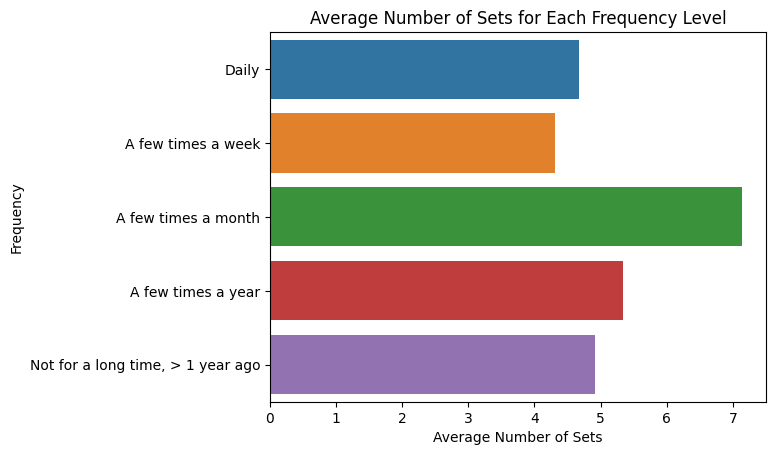

In [9]:
# I needed to specify an order because the order was displaying in the order they appeared in the data
order = ['Daily', 'A few times a week', 'A few times a month', 'A few times a year', 'Not for a long time, > 1 year ago']
sns.barplot(x='sets', y='frequency', data=musicians_df, errorbar=None, order=order)

plt.xlabel('Average Number of Sets')
plt.ylabel('Frequency')
plt.title('Average Number of Sets for Each Frequency Level')
plt.show()

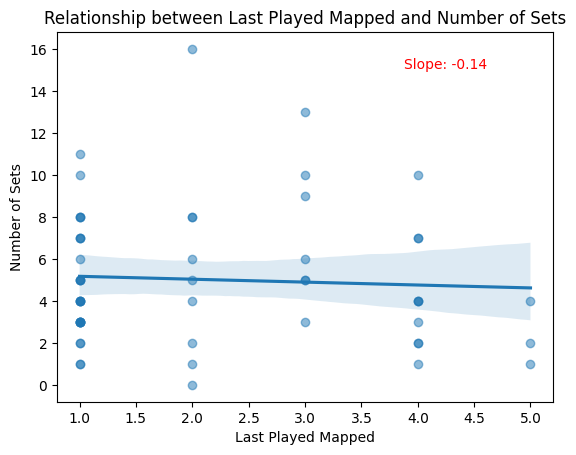

In [10]:
# fixing another data point
musicians_df.at[102, 'last_played'] = 'Today!'

last_played_mapping = {
    'Today!': 5,
    'This week': 4,
    'This month': 3,
    'This year': 2,
    'A long time ago, > 1 year': 1
}

musicians_df['last_played_mapped'] = musicians_df['last_played'].map(last_played_mapping)

sns.regplot(x='last_played_mapped', y='sets', data=musicians_df, scatter_kws={'alpha': 0.5})
slope, intercept = np.polyfit(musicians_df['last_played_mapped'], musicians_df['sets'], 1)

plt.xlabel('Last Played Mapped')
plt.ylabel('Number of Sets')
plt.title('Relationship between Last Played Mapped and Number of Sets')
plt.annotate(f'Slope: {slope:.2f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10, color='red')
plt.show()

# same reason as above, mapping the last time the participant read sheet music to a numeric value 1-5, so we can see a trendline.
# shows the same data as the barplot below

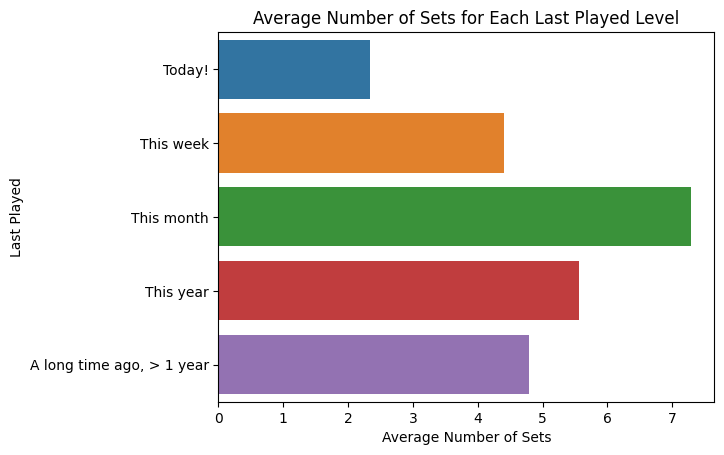

In [11]:

last_played_order = ['Today!', 'This week', 'This month', 'This year', 'A long time ago, > 1 year']

average_sets_by_last_played = musicians_df.groupby('last_played')['sets'].mean().reindex(last_played_order).reset_index()
sns.barplot(x='sets', y='last_played', data=average_sets_by_last_played, errorbar=None, order=last_played_order)

plt.xlabel('Average Number of Sets')
plt.ylabel('Last Played')
plt.title('Average Number of Sets for Each Last Played Level')
plt.show()

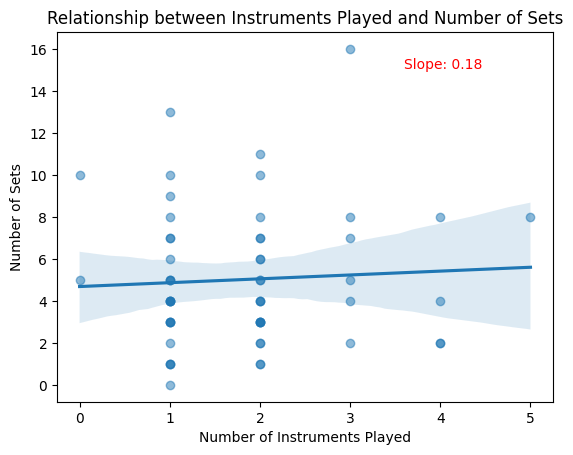

In [12]:
sns.regplot(x='inst_count', y='sets', data=musicians_df, scatter_kws={'alpha': 0.5})
slope, intercept = np.polyfit(musicians_df['inst_count'], musicians_df['sets'], 1)

plt.xlabel('Number of Instruments Played')
plt.ylabel('Number of Sets')
plt.title('Relationship between Instruments Played and Number of Sets')
plt.annotate(f'Slope: {slope:.2f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10, color='red')
plt.show()

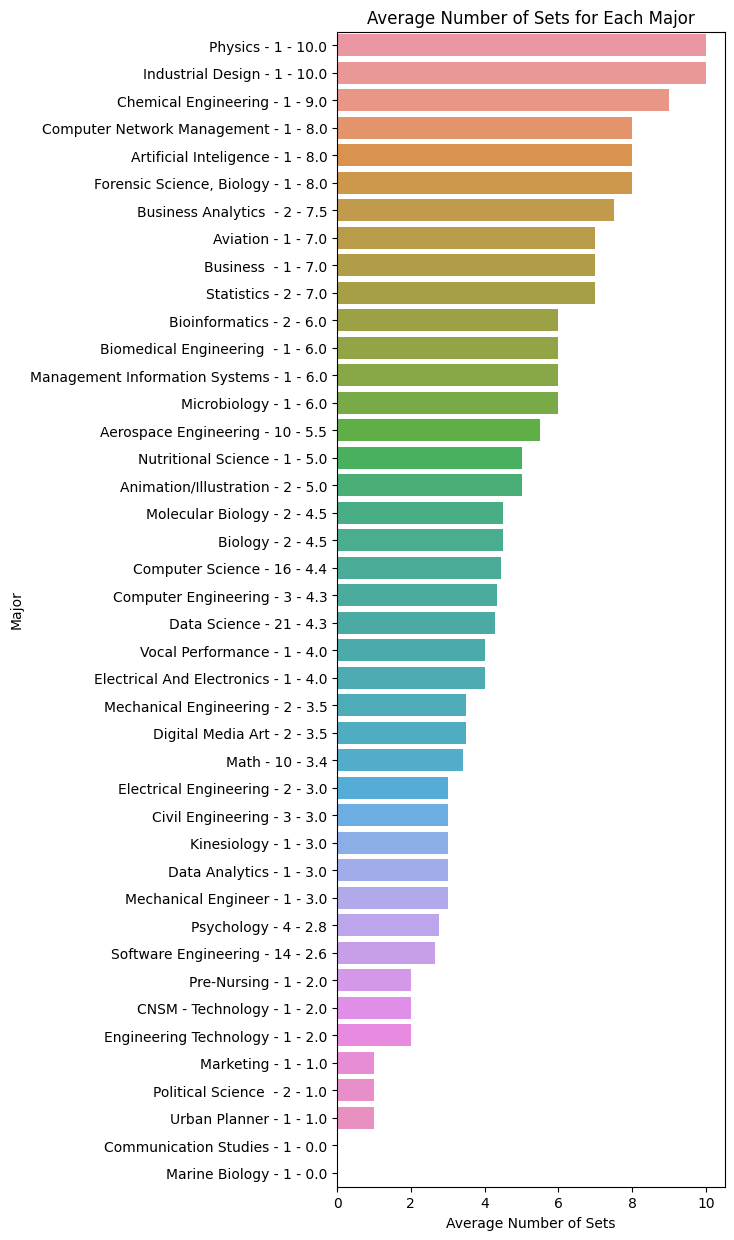

In [13]:
plt.figure(figsize=(5,15))
# average number of sets and count of data points for each major
average_sets_by_major = df.groupby('major')['sets'].agg(['mean', 'count']).sort_values(by='mean', ascending=False).reset_index()

ax = sns.barplot(x='mean', y='major', data=average_sets_by_major, errorbar=None, order=average_sets_by_major['major'])

y_labels = [f'{major} - {count} - {average:.1f}' for major, count, average in zip(
    average_sets_by_major['major'], average_sets_by_major['count'], average_sets_by_major['mean'])]

ax.set_yticklabels(y_labels)

plt.xlabel('Average Number of Sets')
plt.ylabel('Major')
plt.title('Average Number of Sets for Each Major')
plt.show()

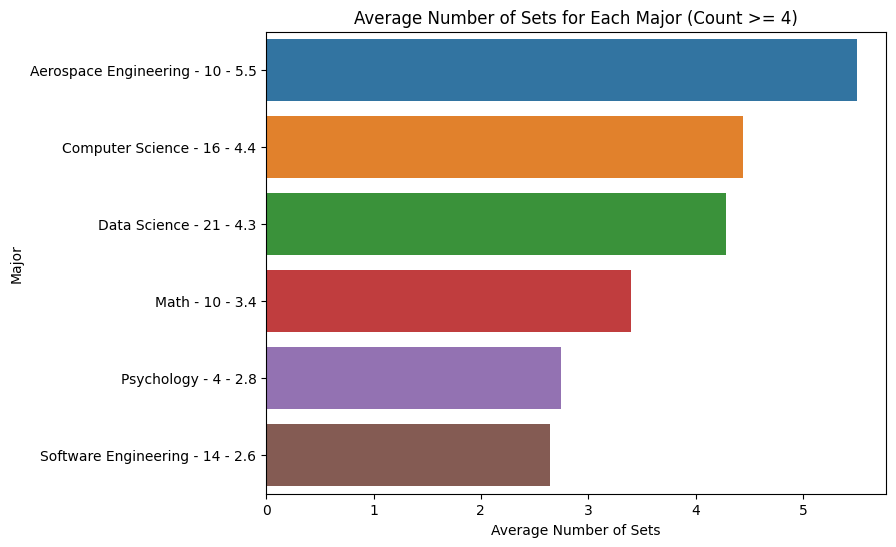

In [14]:
filtered_average_sets_by_major = average_sets_by_major[average_sets_by_major['count'] >= 4]

plt.figure(figsize=(8, 6))

ax = sns.barplot(x='mean', y='major', data=filtered_average_sets_by_major, order=filtered_average_sets_by_major['major'])

y_labels = [f'{major} - {count} - {average:.1f}' for major, count, average in zip(
    filtered_average_sets_by_major['major'], filtered_average_sets_by_major['count'], filtered_average_sets_by_major['mean'])]

ax.set_yticklabels(y_labels)

plt.xlabel('Average Number of Sets')
plt.ylabel('Major')
plt.title('Average Number of Sets for Each Major (Count >= 4)')
plt.show()